INFO6105 Data Science Engineering and Tools

Vidhi Patel NUID: 002762999 HW3

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
folder_path = 'Desktop/melatonin'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
print('list of csv files:-')
for file in csv_files:
    print(file)

data_frames = []

for file in csv_files:
    file_name = file.split('.')[0] 
    file_path = os.path.join(folder_path, file) 
    df = pd.read_csv(file_path)
    data_frames.append(df)

list of csv files:-
B00K8K937I_Puritan'sPrideSuperStrengthRapidReleaseCapsules Melatonin-2mg.csv
B079TD7HG2_NatrolMelatoninSleepAidGummy-10mg.csv
B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets-12mg.csv
B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies-1mg.csv
B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements-10mg.csv
B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets-12mg.csv
B08CGYFB2Q_VitamaticMelatonin20mgTablets-20mg.csv


Part 1: Text Feature Extraction for NLP

1. Organizing the csv files and merging them into a dataframe

In [3]:
df = pd.concat(data_frames, ignore_index=True)
df.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I


In [4]:
df.tail()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
15905,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,BENSONfla,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B08CGYFB2Q,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,BEST YET 20 MG FALL ASLEEP LESS THAN 30 MINUTE...,NaN,SLEEP EASY,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/R3K...,B08CGYFB2Q
15906,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Jonita J. Wertz,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B08CGYFB2Q,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,I was recommended melatonin by my Doctor. I be...,NaN,Performed well,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/R2G...,B08CGYFB2Q
15907,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,RGTtellasis,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B08CGYFB2Q,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,Highest mg ratings for lowest $ amount and tas...,NaN,More Mg less $,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/R3D...,B08CGYFB2Q
15908,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Janna K. Haik,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B08CGYFB2Q,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,"The initial taste wasn’t too bad, but the long...",NaN,Yuck!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/R3Z...,B08CGYFB2Q
15909,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Navyflier7,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B08CGYFB2Q,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,Great product,NaN,Fast acting no morning after sluggishness,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/R2W...,B08CGYFB2Q


In [5]:
df.columns

Index(['asin', 'product_title', 'average_rating', 'total_reviews',
       'review_author', 'author_badge', 'badge', 'reviewed_product_attribute',
       'reviewed_variant_asin', 'variant_review_url', 'review_rating',
       'review_date', 'reviewed_country', 'review_text',
       'review_comment_count', 'review_header', 'no_of_people_reacted_helpful',
       'author_profile_url', 'url', 'brand', 'review_url', 'input'],
      dtype='object')

In [6]:
df.shape

(15910, 22)

In [7]:
print("Columns with Null values:\n", df.isnull().sum())

Columns with Null values:
 asin                                0
product_title                       0
average_rating                      0
total_reviews                       0
review_author                       0
author_badge                    15808
badge                             309
reviewed_product_attribute       2095
reviewed_variant_asin            2095
variant_review_url               2095
review_rating                       0
review_date                         0
reviewed_country                    0
review_text                        28
review_comment_count            15910
review_header                       5
no_of_people_reacted_helpful    13149
author_profile_url                  0
url                                 0
brand                               0
review_url                          0
input                               0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   asin                          15910 non-null  object 
 1   product_title                 15910 non-null  object 
 2   average_rating                15910 non-null  float64
 3   total_reviews                 15910 non-null  int64  
 4   review_author                 15910 non-null  object 
 5   author_badge                  102 non-null    object 
 6   badge                         15601 non-null  object 
 7   reviewed_product_attribute    13815 non-null  object 
 8   reviewed_variant_asin         13815 non-null  object 
 9   variant_review_url            13815 non-null  object 
 10  review_rating                 15910 non-null  int64  
 11  review_date                   15910 non-null  object 
 12  reviewed_country              15910 non-null  object 
 13  r

(1) Removing columns with unnecessary features and null values

In [9]:
remove_columns = ['author_badge', 'badge','reviewed_product_attribute','reviewed_variant_asin','variant_review_url','review_comment_count', 'no_of_people_reacted_helpful','author_profile_url', 'url','brand','review_url', 'input'] 

df.drop(columns=remove_columns, inplace=True)

print("\nDataFrame after removing unnecessary features:")
df


DataFrame after removing unnecessary features:


,asin,product_title,average_rating,total_reviews,review_author,review_rating,review_date,reviewed_country,review_text,review_header
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,4,02-May-21,United States,"These works great, I think the gel capsule dis...",Max dose and it hits faster than other quick r...
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,4,11-May-22,United States,Powerful! Will knock you right out!,Powerful!
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,5,10-May-21,United States,"Best melatonin I've tried,so much better then ...",Amazing
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,5,20-Apr-17,United States,"Works like a charm, great price.",Five Stars
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,5,18-Aug-20,United States,"I love this product, I use it to sleep at nigh...","This is one great product, people should try it."
...,...,...,...,...,...,...,...,...,...,...
15905,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,BENSONfla,5,20-Oct-21,United States,BEST YET 20 MG FALL ASLEEP LESS THAN 30 MINUTE...,SLEEP EASY
15906,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Jonita J. Wertz,5,20-May-21,United States,I was recommended melatonin by my Doctor. I be...,Performed well
15907,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,RGTtellasis,5,17-Dec-20,United States,Highest mg ratings for lowest $ amount and tas...,More Mg less $
15908,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Janna K. Haik,2,7-Apr-22,United States,"The initial taste wasn’t too bad, but the long...",Yuck!


In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

In [11]:
data = df.copy()

In [12]:
df['review_text'] = df['review_text'].astype(str)

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text) 
    text = re.sub(r'https?:\/\/\S+', '', text)     
    text = re.sub(r'#', '', text)                   
    text = text.lower()                             
    return text

df['review_text'] = df['review_text'].apply(clean_text)

def allclean(text):
    text = re.sub('[^A-Za-z0-9]', ' ', text) 
    return text

df['review_text'] = df['review_text'].apply(allclean)

print(df.head())


         asin                                      product_title  \
0  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
1  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
2  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
3  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
4  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   

   average_rating  total_reviews    review_author  review_rating review_date  \
0             4.6           3273        Thomas B.              4   02-May-21   
1             4.6           3273     Andie Allday              4   11-May-22   
2             4.6           3273  douglas w smith              5   10-May-21   
3             4.6           3273  Amazon Customer              5   20-Apr-17   
4             4.6           3273   Leslie Masters              5   18-Aug-20   

  reviewed_country                                        review_text  \
0   United States   these works great

In [13]:
#removing stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop]
    cleaned_text = ' '.join(words)
    return cleaned_text

df['review_text'] = df['review_text'].apply(remove_stopwords)

print(df.head())

         asin                                      product_title  \
0  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
1  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
2  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
3  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
4  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   

   average_rating  total_reviews    review_author  review_rating review_date  \
0             4.6           3273        Thomas B.              4   02-May-21   
1             4.6           3273     Andie Allday              4   11-May-22   
2             4.6           3273  douglas w smith              5   10-May-21   
3             4.6           3273  Amazon Customer              5   20-Apr-17   
4             4.6           3273   Leslie Masters              5   18-Aug-20   

  reviewed_country                                        review_text  \
0   United States   works great think

In [14]:
from collections import Counter
from nltk.tokenize import word_tokenize
#removing unnecessary words and null values
df = df.dropna(subset=['review_text'])
reviews = df['review_text'].tolist()
tokens = []
stop_words = set(stopwords.words('english'))
unnecessary_words = ['i', 'the', 'is', 'and', 'it', 'to', 'of', 'in', 'for', 'this', 'that','then','when','what','how']

for review in reviews:
    if isinstance(review, str):  
        review = review.lower() 
        review_tokens = word_tokenize(review)
        cleaned_tokens = [re.sub(r'[^\w\s]', '', word) for word in review_tokens if word not in stop_words and word not in unnecessary_words]
        cleaned_tokens = [word for word in cleaned_tokens if word] 
        tokens.append(cleaned_tokens)
        
all_tokens = [word for sublist in tokens for word in sublist]

#counting how many times each word has occurred
word_freq = Counter(all_tokens)

#Printing the most common words in review_text
print("Most common words in the review_text:")
for word, frequency in word_freq.most_common(20):
    print(f"{word}: {frequency}")

Most common words in the review_text:
sleep: 6960
melatonin: 3282
work: 3091
great: 3072
take: 2940
asleep: 2924
good: 2865
night: 2759
product: 2717
works: 2615
taste: 2585
like: 2571
get: 1937
one: 1863
well: 1814
help: 1624
gummies: 1538
fall: 1536
time: 1510
taking: 1413


 (2) Add a 'dose' column by extracting the dose from "product_title" column or from the file name. 10 points

In [15]:
#extracting the dose from the product_title column
df['dose'] = df['product_title'].str.extract(r'(\d+)\s*mg')

df = df.dropna(subset=['dose']) 
print("\nDataFrame with 'dose' column:")
df


DataFrame with 'dose' column:


,asin,product_title,average_rating,total_reviews,review_author,review_rating,review_date,reviewed_country,review_text,review_header,dose
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,4,02-May-21,United States,works great think gel capsule dissolves much f...,Max dose and it hits faster than other quick r...,2
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,4,11-May-22,United States,powerful knock right,Powerful!,2
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,5,10-May-21,United States,best melatonin tried much better,Amazing,2
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,5,20-Apr-17,United States,works like charm great price,Five Stars,2
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,5,18-Aug-20,United States,love product use sleep night every time take m...,"This is one great product, people should try it.",2
...,...,...,...,...,...,...,...,...,...,...,...
15905,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,BENSONfla,5,20-Oct-21,United States,best yet 20 mg fall asleep less 30 minutes mor...,SLEEP EASY,20
15906,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Jonita J. Wertz,5,20-May-21,United States,recommended melatonin doctor believe product h...,Performed well,20
15907,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,RGTtellasis,5,17-Dec-20,United States,highest mg ratings lowest amount taste also ex...,More Mg less $,20
15908,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Janna K. Haik,2,7-Apr-22,United States,initial taste bad longer took dissolve worse t...,Yuck!,20


In [16]:
df['dose'].value_counts()

dose
12    5760
10    4650
2     3200
1     1300
20    1000
Name: count, dtype: int64

2. This analysis can be various. You need to try to ask various questions, then analyze and visualize them (EDA). 

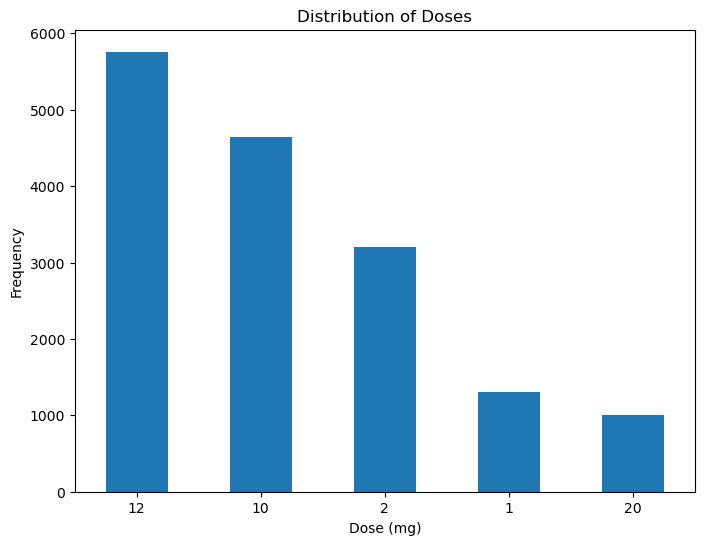

In [17]:
import matplotlib.pyplot as plt

#what is the distribution of different doses?

plt.figure(figsize=(8, 6))
df['dose'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of Doses')
plt.xlabel('Dose (mg)')
plt.ylabel('Frequency')
plt.show()

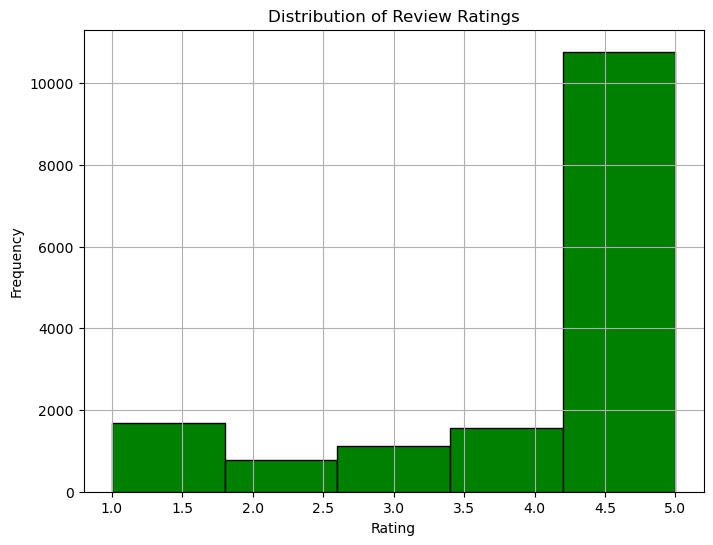

In [18]:
# Histogram to visualize review ratings
plt.figure(figsize=(8, 6))
plt.hist(df['review_rating'], bins=5, color='green', edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

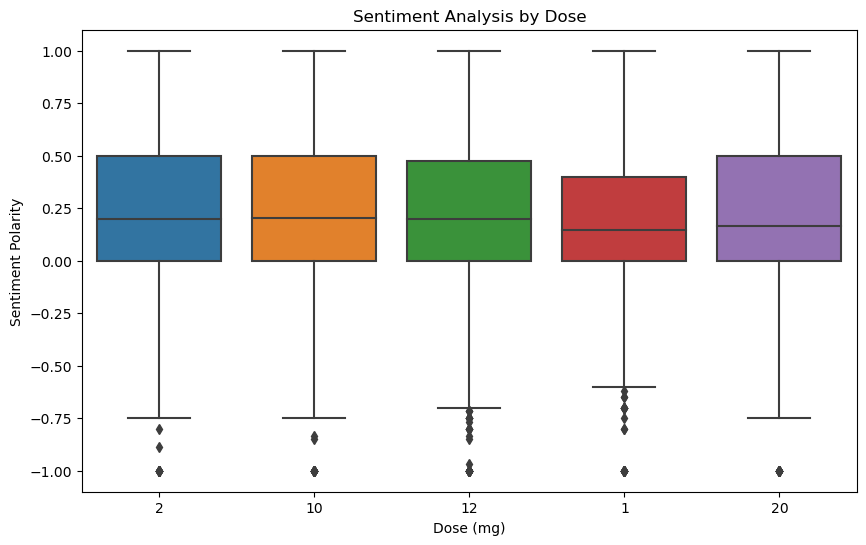

In [19]:
from textblob import TextBlob
import seaborn as sns

# Calculate sentiment polarity for each review
df['sentiment'] = df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution by dose
plt.figure(figsize=(10, 6))
sns.boxplot(x='dose', y='sentiment', data=df)
plt.title('Sentiment Analysis by Dose')
plt.xlabel('Dose (mg)')
plt.ylabel('Sentiment Polarity')
plt.show()

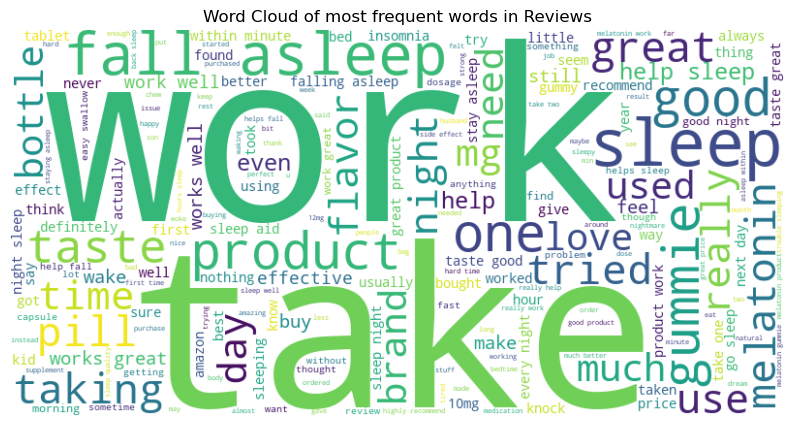

In [20]:
#what are the most common words?
from wordcloud import WordCloud
cleaned_reviews = ' '.join(all_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of most frequent words in Reviews')
plt.axis('off')
plt.show()

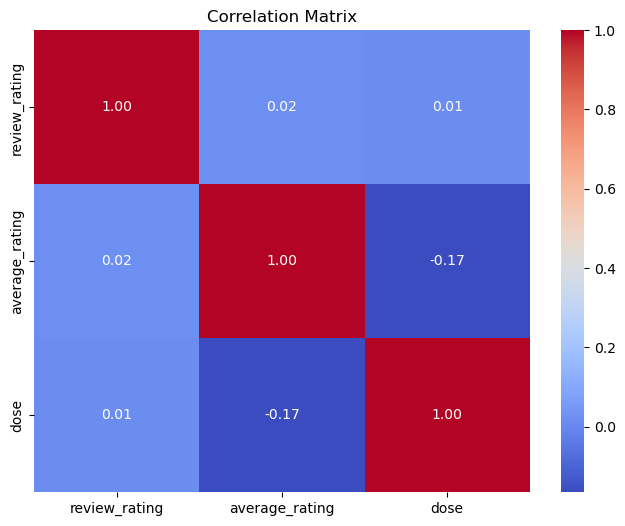

In [21]:
correlation_matrix = df[['review_rating','average_rating','dose']].corr()

#Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

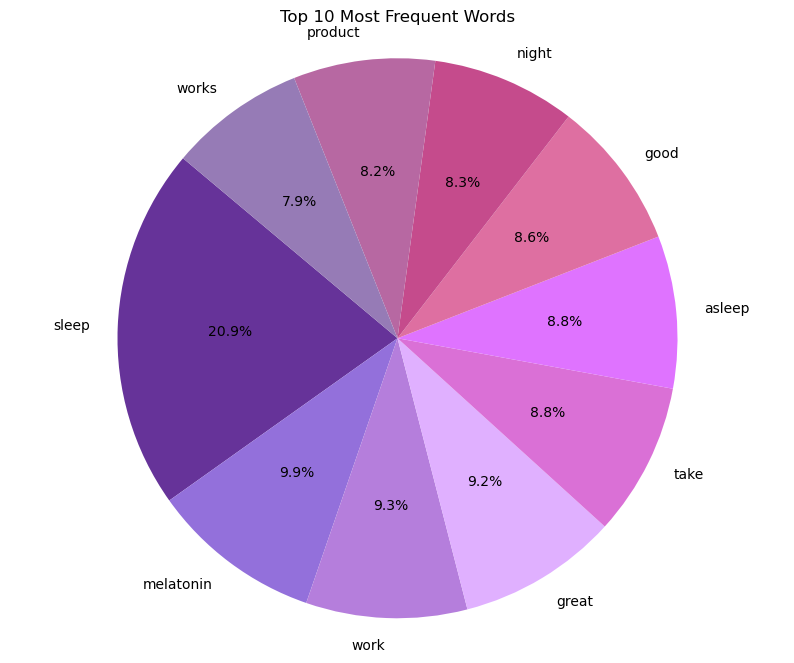

In [22]:
#Showing the top 10 most frequent words in pie chart
top_words = word_freq.most_common(10)
colors = ['#663399', '#9370DB', '#B57EDC', '#E0B0FF', '#DA70D6', '#DF73FF', '#DE6FA1', '#C54B8C', '#B768A2','#967BB6']

words = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]

plt.figure(figsize=(10, 8))
plt.pie(frequencies, labels=words, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 10 Most Frequent Words')
plt.axis('equal')
plt.show()

3. You need to work with (text) reviews such as the features "review_text" or/and "review_header" according to the steps of NLP (Natural Language Processing) to analyze the reviews of different doses (such as 1mg, 2mg, 10mg, 12mg, 20mg). Based on the different doses, extract useful words/phases for analysis of the people's reaction after taking melatonin and sleep situation (before and after if possible). 

In [23]:
#Sentiment analysis for each dose
ascending = ['1','2', '10', '12', '20']
sentiment_analysis = df.groupby('dose')['review_rating'].mean().reindex(ascending)

print("\nSentiment Analysis for Each Dose Category:")
print(sentiment_analysis)


Sentiment Analysis for Each Dose Category:
dose
1     3.896923
2     4.204688
10    4.252688
12    4.235764
20    3.985000
Name: review_rating, dtype: float64


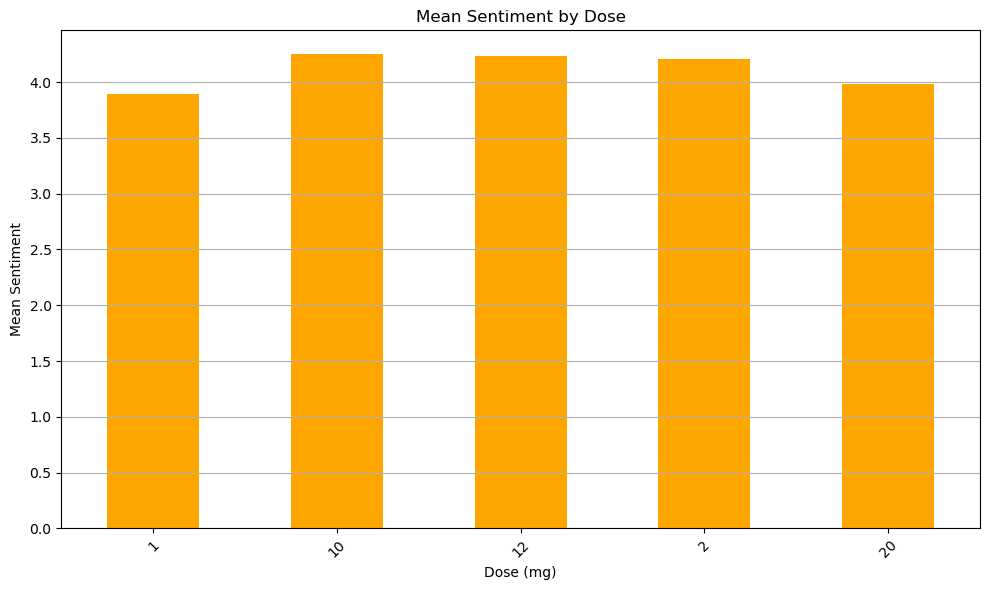

In [24]:
#Sentiment analysis visualized by dose in a bar plot
sentiment_stats = df.groupby('dose')['review_rating'].agg(['mean', 'median', 'std'])

plt.figure(figsize=(10, 6))
sentiment_stats['mean'].plot(kind='bar', color='orange')
plt.title('Mean Sentiment by Dose')
plt.xlabel('Dose (mg)')
plt.ylabel('Mean Sentiment')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

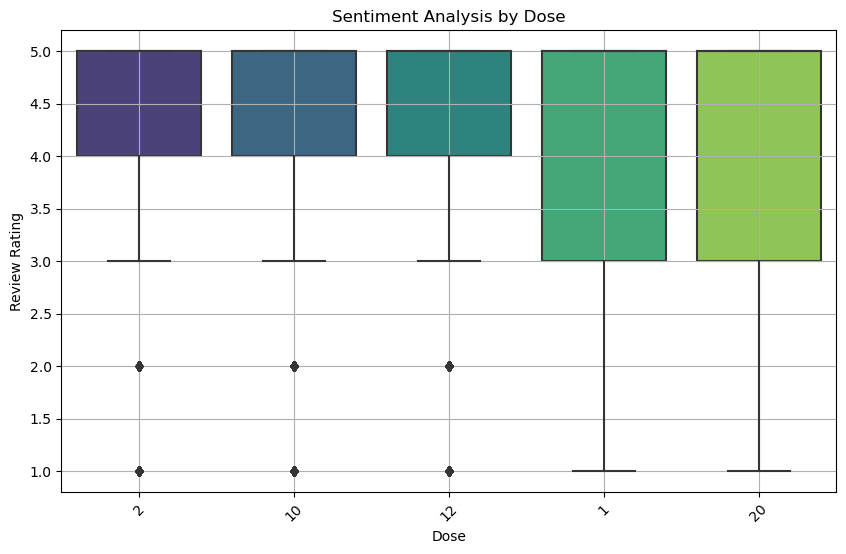

In [25]:
#Box plot for sentiment analysis by dose
plt.figure(figsize=(10, 6))
sns.boxplot(x='dose', y='review_rating', data=df, palette='viridis')
plt.title('Sentiment Analysis by Dose')
plt.xlabel('Dose')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

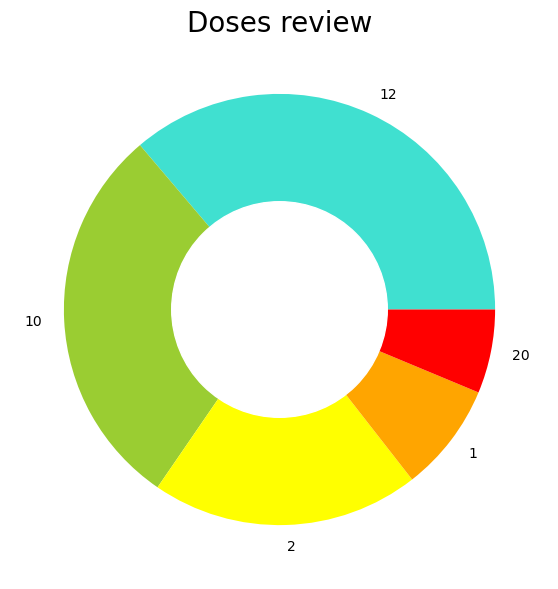

In [26]:
#Breakdown of all the ratings
ratings = df["dose"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["turquoise","yellowgreen","yellow", "orange","red"]
plt.figure(figsize=(7, 7))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Doses review", fontsize=20)
plt.show()

In [27]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [28]:
get_sentiment_label("I love this medicine")

'positive'

In [29]:
get_sentiment_label("I hate this medicine")

'negative'

In [30]:
df['sentiment_label'] = df['review_text'].apply(get_sentiment_label)

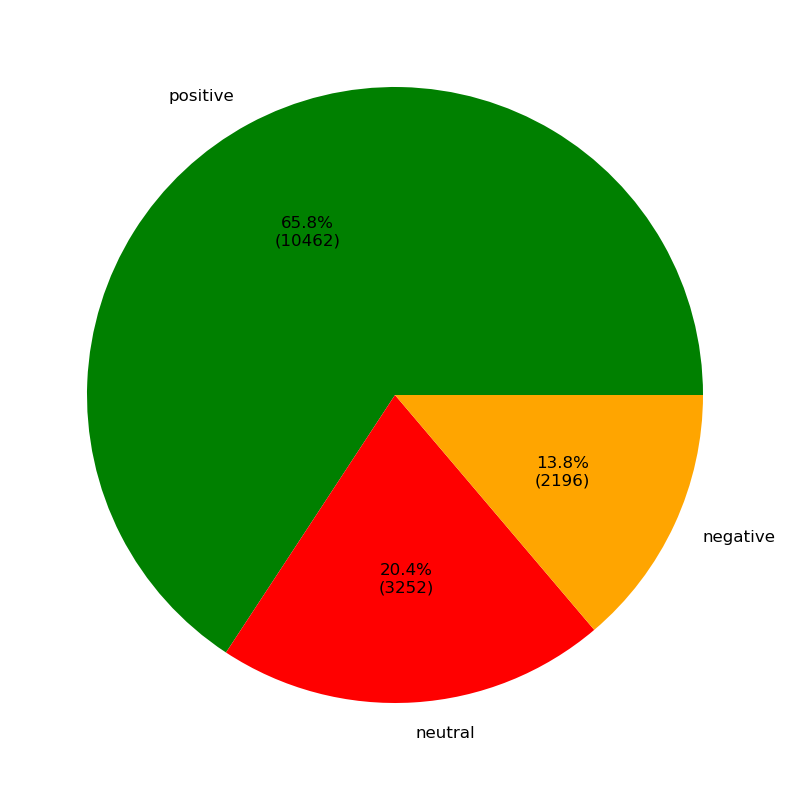

In [31]:
plt.figure(figsize=(13, 10))

# Define a function to format the autopct
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

s = df['sentiment_label'].value_counts()

# Define colors for each section
colors = ['green', 'red', 'orange']

# Plot the pie chart with colors
plt.pie(s, labels=s.index, autopct=autopct_format(s), colors=colors)

plt.show()

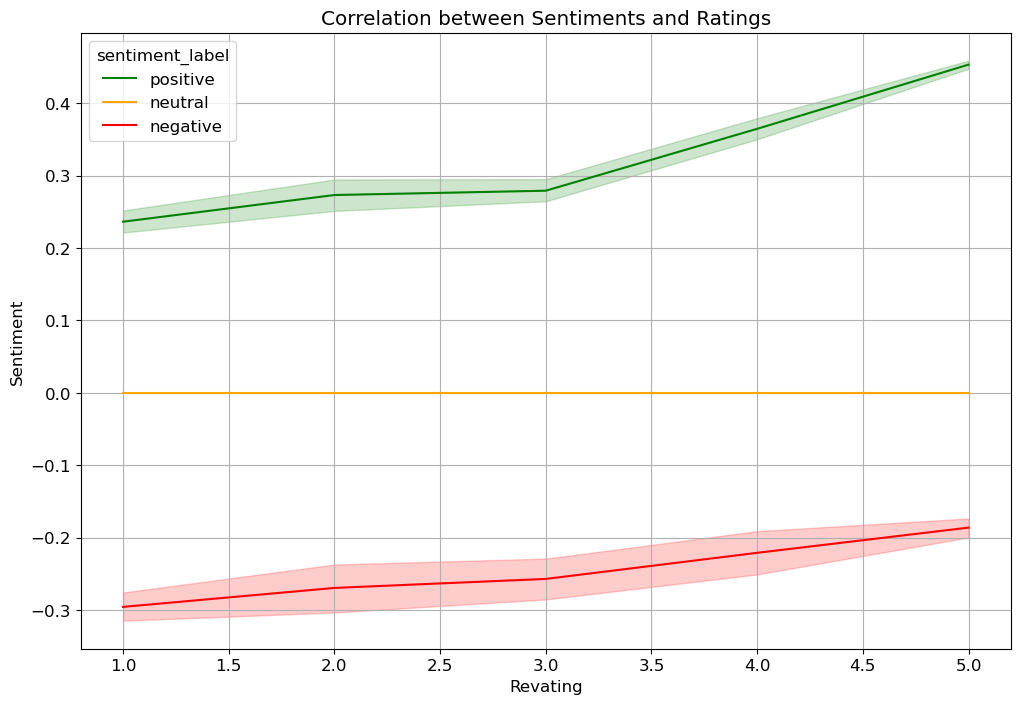

In [32]:
plt.figure(figsize=(12, 8))
colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

sns.lineplot(data=df, x='review_rating', y='sentiment', hue='sentiment_label', palette=colors)

plt.title('Correlation between Sentiments and Ratings')
plt.xlabel('Revating')
plt.ylabel('Sentiment')

plt.grid(True)
plt.show()

Part 2: Machine Learning

Based on Part 1 analysis, a model should be trained and can be used to predict that people in different sleep states may choose a certain dose of melatonin.

If results in Part 1 are not enough to complete Part 2, you should do further data processing and analysis to get enough samples.

In [33]:
#tokenization
from nltk.tokenize import word_tokenize

In [34]:
# Tokenize the reviews
df['tokens'] = df['review_text'].apply(word_tokenize)
#normalization
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) 
    return text

In [35]:
# Apply normalization to the reviews
df['normalized_text'] = df['review_text'].apply(normalize_text)

#removing stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)
#feature selection
X = df['normalized_text']
y= df['dose']

In [36]:
#data splitting
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['normalized_text'], df['dose'], test_size=0.2, random_state=42)

In [37]:
#vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Support Vector Machine Model

In [38]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_vectorized, y_train)

SVC(kernel='linear', random_state=42)

In [39]:
# Predictions
y_pred_train = svm_model.predict(X_train_vectorized)
y_pred_test = svm_model.predict(X_test_vectorized)

In [40]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [41]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.6447203016970459
Testing Accuracy: 0.5201131363922061


In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix_svm = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix for SVM:")
print(confusion_matrix_svm)

Confusion Matrix for SVM:
[[ 17  89 131  15   1]
 [  5 516 357  77   0]
 [  2 138 895 126   3]
 [  1  58 335 219   0]
 [  2  22 140  25   8]]


In [43]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred_test)

print("Classification Report for SVM:")
print(classification_rep)

Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.63      0.07      0.12       253
          10       0.63      0.54      0.58       955
          12       0.48      0.77      0.59      1164
           2       0.47      0.36      0.41       613
          20       0.67      0.04      0.08       197

    accuracy                           0.52      3182
   macro avg       0.58      0.35      0.36      3182
weighted avg       0.55      0.52      0.48      3182



Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['normalized_text'])
y = df['dose']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [48]:
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print("Random Forest Training Accuracy:", train_accuracy_rf)
print("Random Forest Testing Accuracy:", test_accuracy_rf)

Random Forest Training Accuracy: 0.9323538654934004
Random Forest Testing Accuracy: 0.511313639220616


In [49]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)

print("Confusion Matrix for Random Forest:")
print(confusion_matrix_rf)

Confusion Matrix for Random Forest:
[[  5 105 124  17   2]
 [  2 521 344  85   3]
 [  6 147 883 121   7]
 [  5  46 346 213   3]
 [  2  27 142  21   5]]


In [50]:
classification_rep_rf = classification_report(y_test, y_pred_test_rf)

print("Classification Report for Random Forest:")
print(classification_rep_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.25      0.02      0.04       253
          10       0.62      0.55      0.58       955
          12       0.48      0.76      0.59      1164
           2       0.47      0.35      0.40       613
          20       0.25      0.03      0.05       197

    accuracy                           0.51      3182
   macro avg       0.41      0.34      0.33      3182
weighted avg       0.49      0.51      0.47      3182

